In [49]:
import h5py 
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Checking prescale features
This is the prescaled dataset

(1838954, 16)
(1838954,)


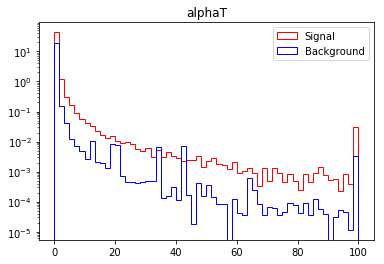

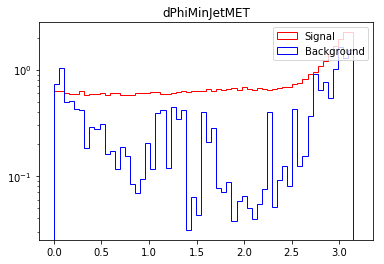

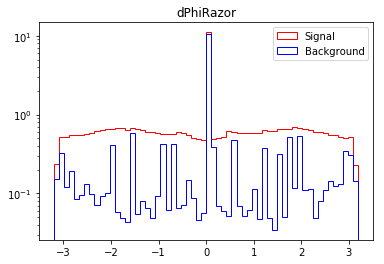

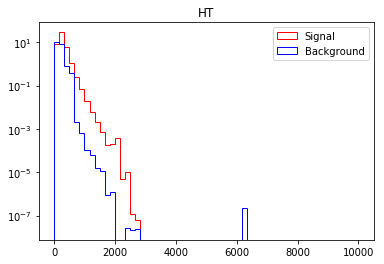

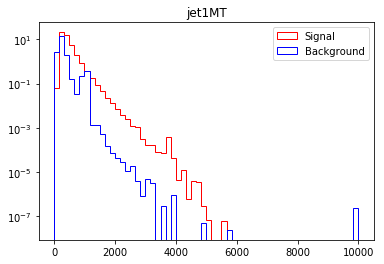

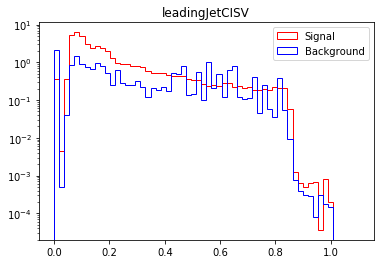

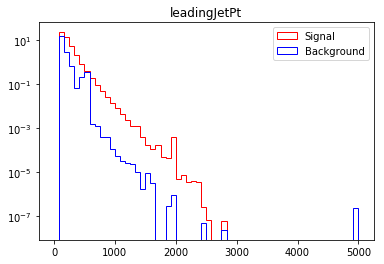

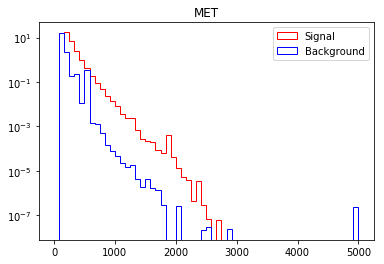

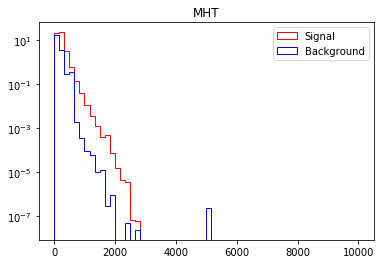

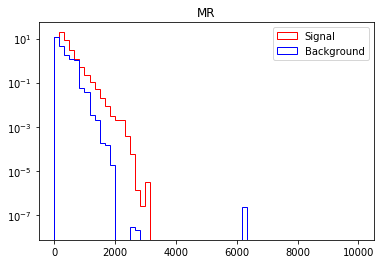

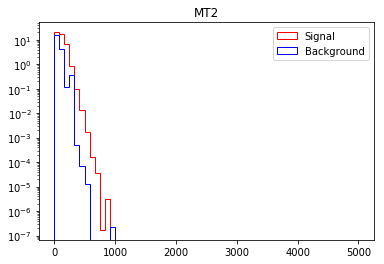

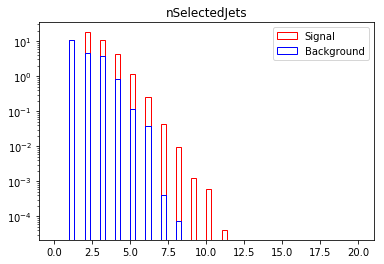

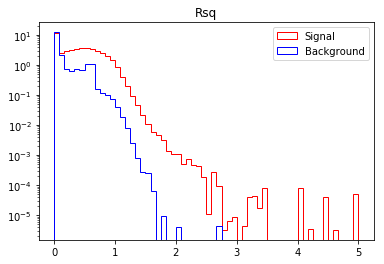

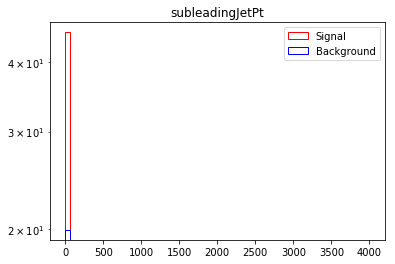

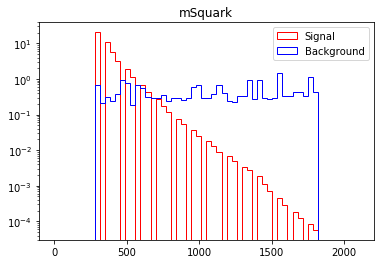

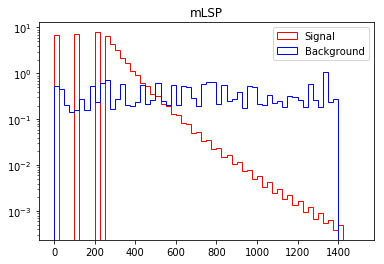

In [72]:
data = h5py.File("/bigdata/shared/analysis/Mono/Parameterized_Monojet.h5")
data.keys()
x_data = data['Training'][:]
label = x_data[:,0]
weight = x_data[:,1]
feature = x_data[:,2:]
print (feature.shape)
print (label.shape)
#from training import remove_outlier
#feature = remove_outlier(feature)
bkg_data = feature[np.where(label<0.5)]
bkg_weight = weight[np.where(label<0.5)]
sn_data = feature[np.where(label>0.5)]
sn_weight = weight[np.where(label>0.5)]
def plot_compare_range(bkg_data, sn_data, order, label='', xlow=0, xhigh=1000):
    plt.figure()
    plt.hist(sn_data[:,order], bins=60, weights=sn_weight, range=(xlow,xhigh), histtype='step', color='r', label='Signal')
    plt.hist(bkg_data[:,order], bins=60, weights=bkg_weight, range=(xlow, xhigh), histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare_range(bkg_data, sn_data, 0, 'alphaT', 0, 100)
plot_compare_range(bkg_data, sn_data, 1, 'dPhiMinJetMET', 0., 3.2)
plot_compare_range(bkg_data, sn_data, 2, 'dPhiRazor', -3.2, 3.2)
plot_compare_range(bkg_data, sn_data, 3, 'HT', 0, 10000)
plot_compare_range(bkg_data, sn_data, 4, 'jet1MT', 0, 10000)
plot_compare_range(bkg_data, sn_data, 5, 'leadingJetCISV', 0, 1.1)
plot_compare_range(bkg_data, sn_data, 6, 'leadingJetPt', 0, 5000)
plot_compare_range(bkg_data, sn_data, 7, 'MET', 0, 5000)
plot_compare_range(bkg_data, sn_data, 8, 'MHT', 0, 10000)
plot_compare_range(bkg_data, sn_data, 9, 'MR', 0, 10000)
plot_compare_range(bkg_data, sn_data, 10, 'MT2', 0, 5000)
plot_compare_range(bkg_data, sn_data, 11, 'nSelectedJets', 0, 20)
plot_compare_range(bkg_data, sn_data, 12, 'Rsq', 0, 5)
plot_compare_range(bkg_data, sn_data, 13, 'subleadingJetPt',0, 4000)
plot_compare_range(bkg_data, sn_data, 14, 'mSquark',0, 2100)
plot_compare_range(bkg_data, sn_data, 15, 'mLSP',0, 1500)
data.close()

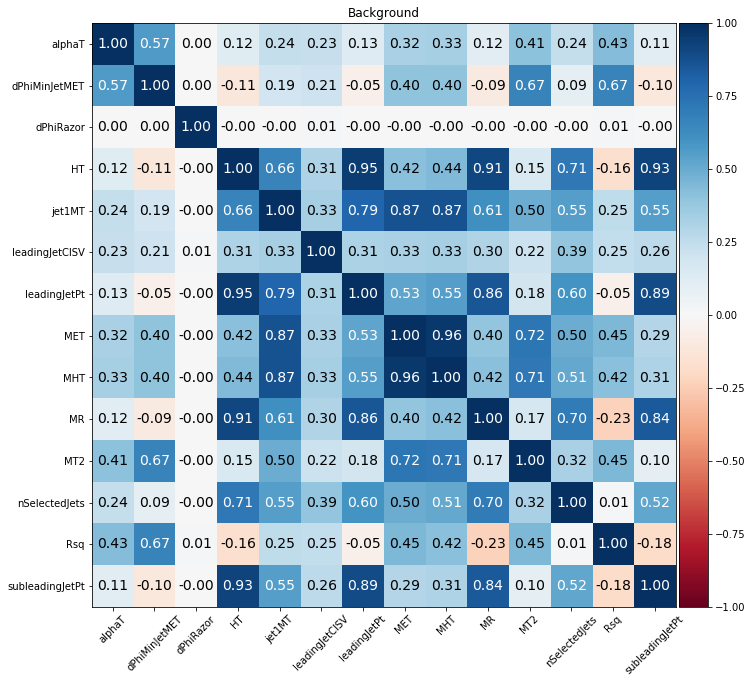

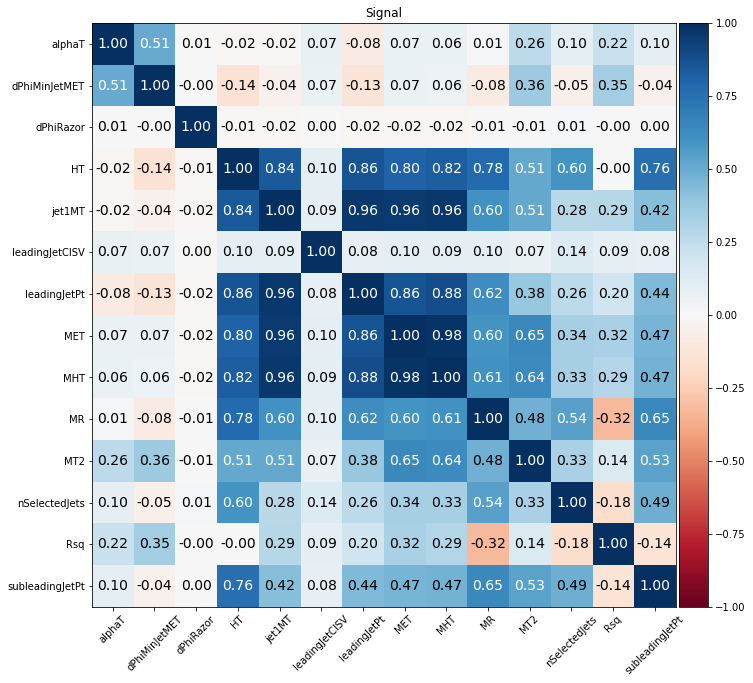

In [36]:
corr_bkg = np.corrcoef(bkg_data, rowvar=0)
corr_sn = np.corrcoef(sn_data, rowvar=0)
from utils import plot_correlation_matrix
plot_correlation_matrix(corr_bkg,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Background',
                      size=(10,10),
                      cmap=plt.cm.RdBu,
                      show_num=True)
plot_correlation_matrix(corr_sn,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Signal',
                      size=(10,10),
                      cmap=plt.cm.RdBu,
                      show_num=True)

### Checking postscaled features
This is the direct input of the neural network, aka, post-scaled features.

Labels:'alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT','leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2','nSelectedJets','Rsq','subleadingJetPt'

['w', 'x', 'y']
(22561110, 16)
(22561110,)


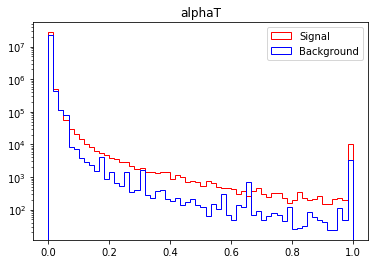

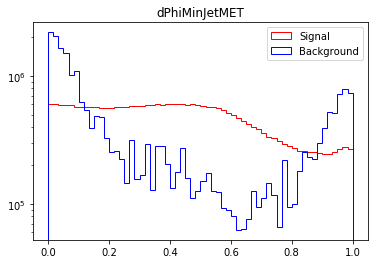

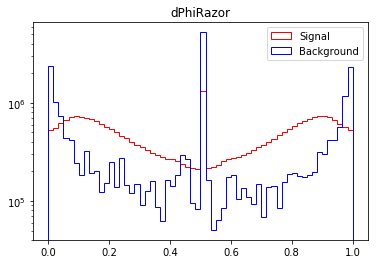

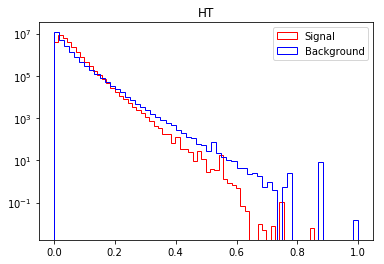

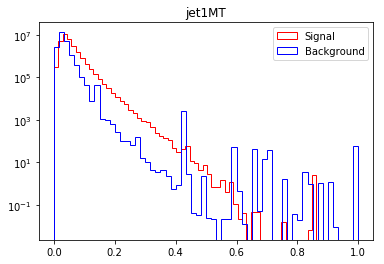

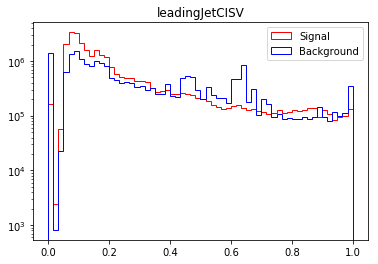

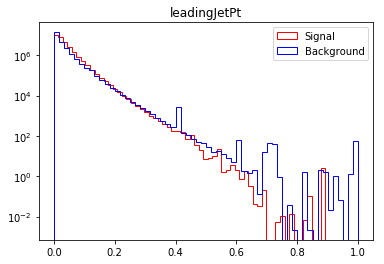

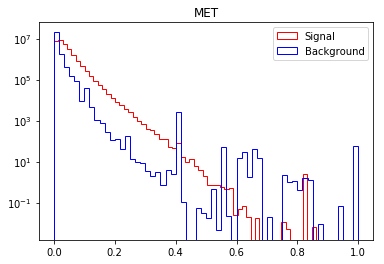

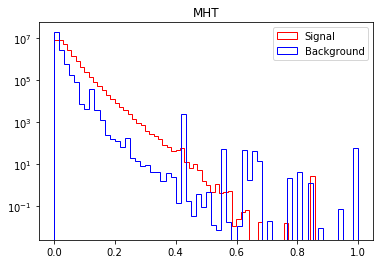

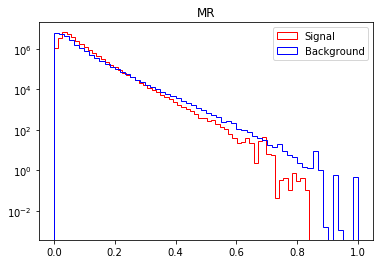

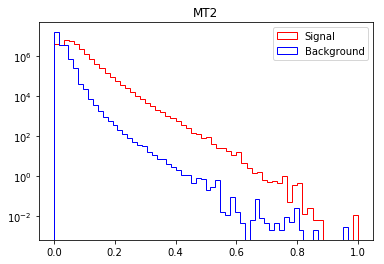

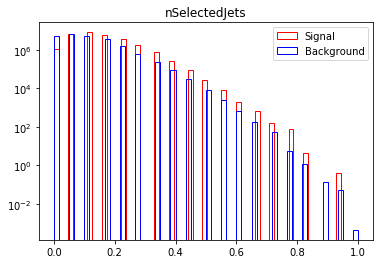

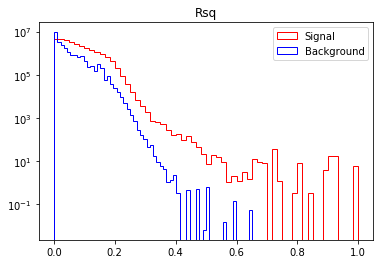

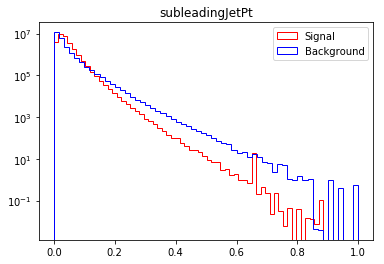

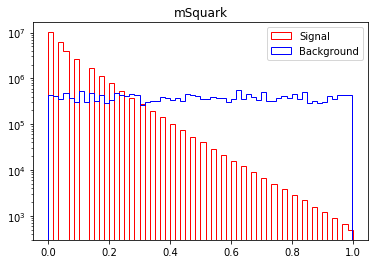

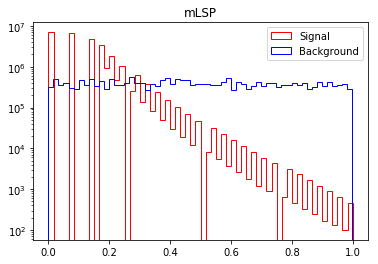

In [44]:
test = h5py.File("ScaledInput/TrainingDataset0.h5")
print(list(test))
y = test['y']
y_num = np.argmax(y,axis=1)
x = test['x'][:]
w = test['w'][:]
print (x.shape)
print (y_num.shape)
bkg = x[np.where(y_num<0.5)]
bkg_w = w[np.where(y_num<0.5)]
sn = x[np.where(y_num>0.5)]
sn_w = w[np.where(y_num>0.5)]
def plot_compare(bkg, sn, order, label=''):
    plt.figure()
    plt.hist(sn[:,order], weights=sn_w, bins=60, histtype='step', color='r', label='Signal')
    plt.hist(bkg[:,order], weights=bkg_w, bins=60, histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare(bkg, sn, 0, 'alphaT')
plot_compare(bkg, sn, 1, 'dPhiMinJetMET')
plot_compare(bkg, sn, 2, 'dPhiRazor')
plot_compare(bkg, sn, 3, 'HT')
plot_compare(bkg, sn, 4, 'jet1MT')
plot_compare(bkg, sn, 5, 'leadingJetCISV')
plot_compare(bkg, sn, 6, 'leadingJetPt')
plot_compare(bkg, sn, 7, 'MET')
plot_compare(bkg, sn, 8, 'MHT')
plot_compare(bkg, sn, 9, 'MR')
plot_compare(bkg, sn, 10, 'MT2')
plot_compare(bkg, sn, 11, 'nSelectedJets')
plot_compare(bkg, sn, 12, 'Rsq')
plot_compare(bkg, sn, 13, 'subleadingJetPt')
plot_compare(bkg, sn, 14, 'mSquark')
plot_compare(bkg, sn, 15, 'mLSP')
test.close()

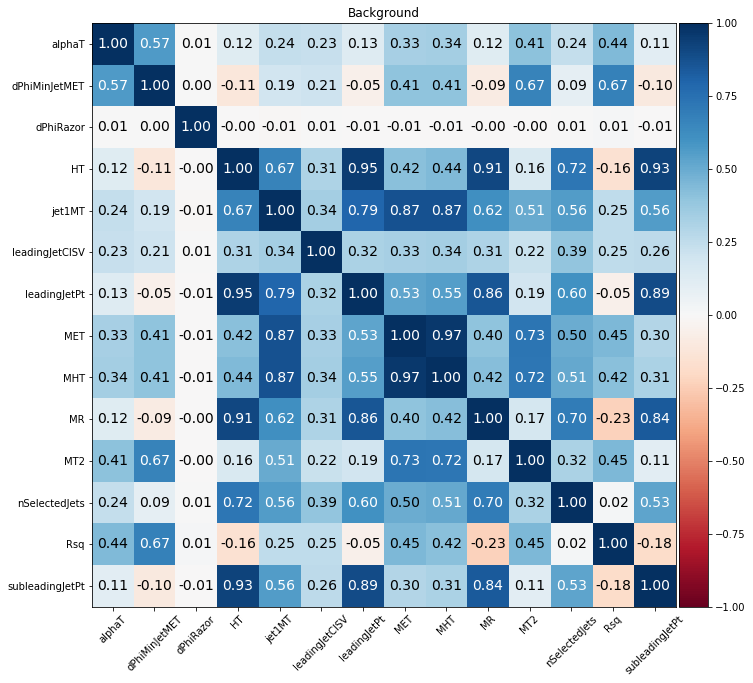

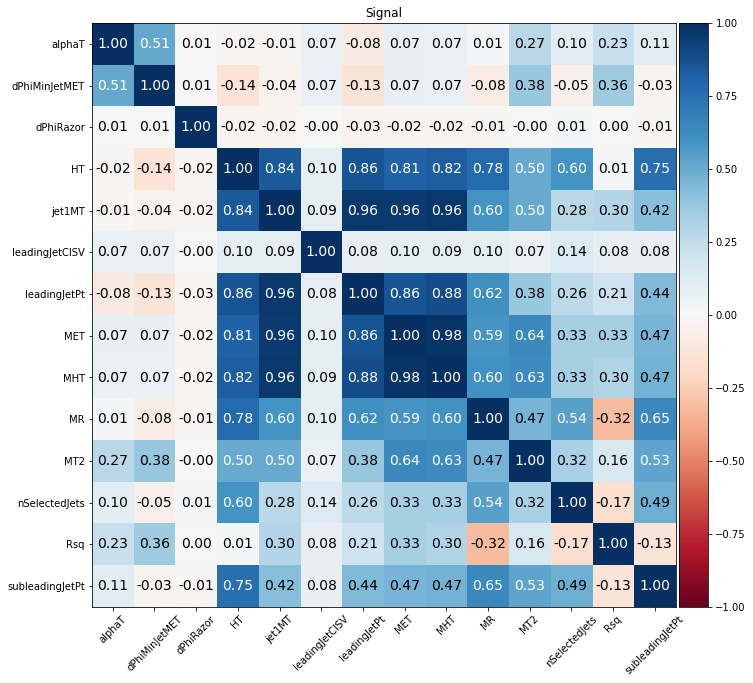

In [37]:
cov_bkg = np.corrcoef(x=bkg, rowvar=0)
cov_sn = np.corrcoef(sn, rowvar=0)
from utils import plot_correlation_matrix
plot_correlation_matrix(cov_bkg,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Background',
                      size=(10,10),
                      cmap=plt.cm.RdBu,
                      show_num=True)
plot_correlation_matrix(cov_sn,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Signal',
                      size=(10,10),
                      cmap=plt.cm.RdBu,
                      show_num=True)


---
### Check the output score of the validation sample

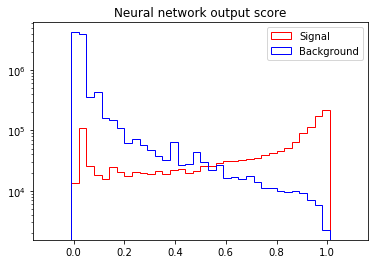

In [18]:
valrel = h5py.File("Result/ValidationResult1000000_Adam.h5","r")
valrel.keys()
val_pred = valrel['Prediction'][:,1]
val_truth = valrel['Truth'][:]
val_weight = valrel['Weight'][:]
val_sn = val_pred[np.where(val_truth>0.5)]
val_bkg = val_pred[np.where(val_truth<0.5)]
weight_sn = val_weight[np.where(val_truth>0.5)]
weight_bkg = val_weight[np.where(val_truth<0.5)]
plt.figure()
plt.hist(val_sn, weights=weight_sn, bins=40, range=(-0.1,1.1), histtype='step', color='r', label='Signal')
plt.hist(val_bkg, weights=weight_bkg, bins=40, range=(-0.1,1.1), histtype='step', color='b', label='Background')
plt.title('Neural network output score')
plt.legend(loc='best')
plt.yscale('log')
plt.show()
valrel.close()

---
### Benchmark study for optimizers, using 1M event sample

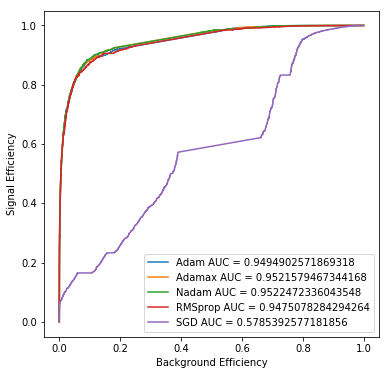

In [30]:
def get_roc_curve(label=''):
    valrel = h5py.File("Result/ValidationResult1000000_{}.h5".format(label),"r")
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    fpr, tpr, thresholds = roc_curve(val_truth, val_pred, sample_weight=val_weight)
    return fpr, tpr
def plot_roc(label=''):
    fpr, tpr = get_roc_curve(label)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {}".format(label, area))
plt.figure(figsize=(6.,6.))
plot_roc('Adam')
plot_roc('Adamax')
plot_roc('Nadam')
plot_roc('RMSprop')
plot_roc('SGD')
plt.ylabel('Signal Efficiency')
plt.xlabel('Background Efficiency')
plt.legend(loc='best')
plt.show()

## Tuning hyperparameters using GridSearchCV

### First want to recheck if Nadam is really the best, and with different numbers of hidden layers.

Run on 1 million events.

    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    layers = [1, 3, 5]
    where layers is defined as:
        for ly in range(layers):
        size = int(100/(ly+1))
        if ly==0:
            model.add(Dense(size, input_shape=(14,), activation='relu'))
        else:
            model.add(Dense(size, activation='relu'))
            
<strong>Best: 0.853338 using {'optimizer': 'Nadam', 'layers': 5}</strong> <br>
0.782973 (0.000990) with: {'optimizer': 'SGD', 'layers': 1} <br>
0.791824 (0.002088) with: {'optimizer': 'RMSprop', 'layers': 1}<br>
0.785968 (0.000984) with: {'optimizer': 'Adagrad', 'layers': 1}<br>
0.788673 (0.000991) with: {'optimizer': 'Adadelta', 'layers': 1}<br>
0.791928 (0.000936) with: {'optimizer': 'Adam', 'layers': 1}<br>
0.791443 (0.000284) with: {'optimizer': 'Adamax', 'layers': 1}<br>
0.795010 (0.000462) with: {'optimizer': 'Nadam', 'layers': 1}<br>
0.785690 (0.000504) with: {'optimizer': 'SGD', 'layers': 3}<br>
0.821409 (0.001923) with: {'optimizer': 'RMSprop', 'layers': 3}<br>
0.792868 (0.001444) with: {'optimizer': 'Adagrad', 'layers': 3}<br>
0.800426 (0.001143) with: {'optimizer': 'Adadelta', 'layers': 3}<br>
0.815632 (0.001344) with: {'optimizer': 'Adam', 'layers': 3}<br>
0.808452 (0.001584) with: {'optimizer': 'Adamax', 'layers': 3}<br>
0.838061 (0.004248) with: {'optimizer': 'Nadam', 'layers': 3}<br>
0.786088 (0.001916) with: {'optimizer': 'SGD', 'layers': 5}<br>
0.835910 (0.007522) with: {'optimizer': 'RMSprop', 'layers': 5}<br>
0.796855 (0.002135) with: {'optimizer': 'Adagrad', 'layers': 5}<br>
0.818701 (0.001206) with: {'optimizer': 'Adadelta', 'layers': 5}<br>
0.824210 (0.005068) with: {'optimizer': 'Adam', 'layers': 5}<br>
0.821119 (0.001973) with: {'optimizer': 'Adamax', 'layers': 5}<br>
0.853338 (0.002919) with: {'optimizer': 'Nadam', 'layers': 5}<br>

Both methods agree Nadam is the best. Now I want to retune the number of layers since it picks the maximum value last time.
Only run on 100000 events since it took ~12 hours to tune with 1 million events last time.

Best: 0.799520 using {'optimizer': 'Nadam', 'layers': 9} <br>
0.792150 (0.001369) with: {'optimizer': 'Nadam', 'layers': 3} <br>
0.792020 (0.005967) with: {'optimizer': 'Nadam', 'layers': 5}<br>
0.794600 (0.001408) with: {'optimizer': 'Nadam', 'layers': 7}<br>
0.799520 (0.002983) with: {'optimizer': 'Nadam', 'layers': 9}<br>
0.796920 (0.000926) with: {'optimizer': 'Nadam', 'layers': 11}<br>

<strong>Conclusion: Nadam + 9 hidden layers are the best.</strong>

Tuning initial neuron size:

Best: 0.932154 using {'init_size': 500} <br> 
0.796788 (0.002218) with: {'init_size': 50} <br> 
0.842962 (0.002249) with: {'init_size': 100} <br> 
0.898378 (0.003378) with: {'init_size': 200}<br>
0.932154 (0.001141) with: {'init_size': 500}<br>

Best: 0.937492 using {'init_size': 1000}<br>
0.901424 (0.000947) with: {'init_size': 200}<br>
0.931410 (0.001289) with: {'init_size': 500}<br>
0.935688 (0.001478) with: {'init_size': 700}<br>
0.937492 (0.001589) with: {'init_size': 1000}<br>

Incredible!

<strong> Note that GridSearchCV does not evaluate with sample weight! </strong>

### Retune with new layers structure
    for lay in range(layers):
        size = int(init_size/2**lay)
        if size < 5: break
        if lay==0:
            model.add(Dense(size, input_shape=(14,), activation='relu'))
        else:
            model.add(Dense(size, activation='relu'))
            
(Each layer's neuron size is half of the previous one)
            
<b>Best: 0.939128 using {'init_size': 1000, 'layers': 3}</b> <br>
0.817596 (0.003410) with: {'init_size': 100, 'layers': 3}<br>
0.818374 (0.005066) with: {'init_size': 100, 'layers': 5}<br>
0.821088 (0.002031) with: {'init_size': 100, 'layers': 7}<br>
0.826714 (0.002995) with: {'init_size': 100, 'layers': 9}<br>
0.927642 (0.002393) with: {'init_size': 500, 'layers': 3}<br>
0.927780 (0.002948) with: {'init_size': 500, 'layers': 5}<br>
0.925328 (0.000273) with: {'init_size': 500, 'layers': 7}<br>
0.927526 (0.001436) with: {'init_size': 500, 'layers': 9}<br>
0.939128 (0.003928) with: {'init_size': 1000, 'layers': 3}<br>
0.937102 (0.001931) with: {'init_size': 1000, 'layers': 5}<br>
0.933468 (0.003146) with: {'init_size': 1000, 'layers': 7}<br>
0.936578 (0.001516) with: {'init_size': 1000, 'layers': 9}<br>

<b>Best: 0.941084 using {'init_size': 1500, 'layers': 2}</b><br>
0.921926 (0.004030) with: {'init_size': 700, 'layers': 2}<br>
0.932664 (0.001950) with: {'init_size': 700, 'layers': 3}<br>
0.935306 (0.001559) with: {'init_size': 700, 'layers': 4}<br>
0.935930 (0.001083) with: {'init_size': 1000, 'layers': 2}<br>
0.937196 (0.001594) with: {'init_size': 1000, 'layers': 3}<br>
0.938826 (0.002331) with: {'init_size': 1000, 'layers': 4}<br>
0.941084 (0.002006) with: {'init_size': 1500, 'layers': 2}<br>
0.939306 (0.003220) with: {'init_size': 1500, 'layers': 3}<br>
0.939764 (0.001109) with: {'init_size': 1500, 'layers': 4}<br>

<b>Best: 0.943364 using {'layers': 2, 'init_size': 5000}</b><br>
0.940178 (0.004910) with: {'layers': 2, 'init_size': 1300}<br>
0.941638 (0.001102) with: {'layers': 2, 'init_size': 1500}<br>
0.939090 (0.002235) with: {'layers': 2, 'init_size': 1800}<br>
0.940762 (0.003762) with: {'layers': 2, 'init_size': 2500}<br>
0.943364 (0.001149) with: {'layers': 2, 'init_size': 5000}<br>

---
### Training on full dataset with sample weight (60 M events)

Prepare to display


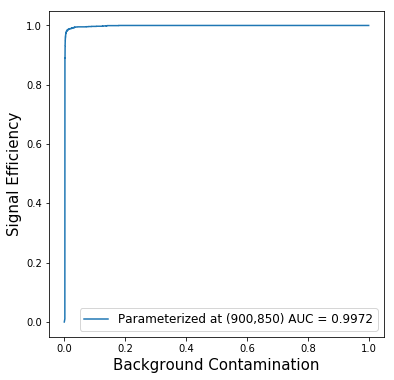

In [15]:
def get_roc_curve(file_name='', use_weight=False):
    valrel = h5py.File(file_name,"r")
    assert(valrel)
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    if use_weight:
        fpr, tpr, thresholds = roc_curve(val_truth, 
                                     val_pred, 
                                     sample_weight=val_weight
                                    )
    else:
        fpr, tpr, thresholds = roc_curve(val_truth, 
                                     val_pred)
    return fpr, tpr
def plot_roc(file_name='',label='', use_weight=False):
    fpr, tpr = get_roc_curve(file_name, use_weight)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {:.4f}".format(label, area))
plt.figure(figsize=(6.,6.))
#plot_roc("Result/ValidationResult0_Nadam.h5",'Validation')
#plot_roc("Result/FeatureRemoval/TestResult0__alphaT.h5",label='', use_weight=True)
plot_roc("Result/TestResult0_Parameterized_Rerandomize_1650_200.h5",label='Parameterized at (900,850)', use_weight=True)
#FEATURES = ['alphaT', 'dPhiMinJetMET', 'dPhiRazor', 'HT', 'jet1MT', 'leadingJetCISV',
#            'leadingJetPt', 'MET', 'MHT', 'MR', 'MT2', 'nSelectedJets', 'Rsq', 'subleadingJetPt']
#for feature in FEATURES:
#    print("{} removed".format(feature))
#    plot_roc("Result/FeatureRemoval/TestResult0__{}.h5".format(feature),label='No {}'.format(feature), use_weight=True)
#plot_roc("Result/FeatureRemoval/TestResult0__alphaT.h5",label='No alphaT', use_weight=True)
#plot_roc("Result/FeatureRemoval/TestResult0__dPhiMinJetMET.h5",label='No dPhiMinJetMET', use_weight=True)
plt.ylabel('Signal Efficiency',fontsize = 15)
plt.xlabel('Background Contamination', fontsize = 15)
plt.legend(loc='best', prop={'size':12})
#plt.yscale('log')
#plt.xscale('log')
print ("Prepare to display")
plt.show()

In [90]:
def get_score(file_name='', title='', use_weight=False, normed=False):
    valrel = h5py.File(file_name,"r")
    assert valrel
    valrel.keys()
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    val_sn = val_pred[np.where(val_truth>0.5)]
    val_bkg = val_pred[np.where(val_truth<0.5)]
    weight_sn = val_weight[np.where(val_truth>0.5)]*1.e-5*35900*5*0.8
    weight_bkg = val_weight[np.where(val_truth<0.5)]*1.e-5*35900*5
    #print (weight_sn.shape[:10])
    #print (weight_bkg.shape[:10])
    #print (val_sn.shape)
    #print (val_bkg.shape)
    plt.figure()
    if use_weight:
        n_sn, bins_sn, _ = plt.hist(val_sn, 
                                weights=weight_sn, 
                                bins=30, range=(0,1), histtype='step', color='r', label='Signal', normed=normed)
        n_bkg, bins_bkg, _ = plt.hist(val_bkg, 
                                  weights=weight_bkg, 
                                  bins=30, range=(0,1), histtype='step', color='b', label='Background', normed=normed)
    else:
        n_sn, bins_sn, _ = plt.hist(val_sn, bins=30, range=(0,1.), histtype='step', color='r', label='Signal', normed=normed)
        n_bkg, bins_bkg, _ = plt.hist(val_bkg, bins=30, range=(0,1.), histtype='step', color='b', label='Background', normed=normed)
    plt.title('Neural network score for {}'.format(title))
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
    valrel.close()
    return bins_sn, n_sn, n_bkg

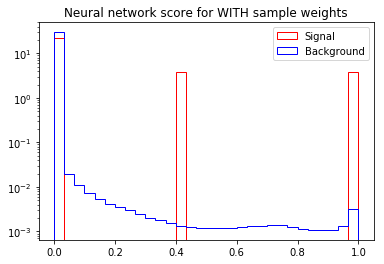

In [95]:
#bins, n_sn, n_bkg = get_score("Result/TestResult0_Monojet_1700_1250.h5", "WITHOUT sample weights", use_weight=False, normed=True)
bins, n_sn, n_bkg = get_score("Result/TestResult0_DiJet_1250_100.h5", "WITH sample weights", use_weight=True, normed=True)
# /bigdata/shared/analysis/Result/TestResult0_Parameterized_1350_600.h5
# Result/TestResult0_Parameterized_Rerandomize_1350_600.h5
integral =  sum(n_sn)
#print (integral)
#bins, n_sn, n_bkg = get_score("Result/FeatureRemoval/TestResult0__alphaT.h5", "Full Test Set without sample weights", use_weight=False)
#integral = sum(n_sn)
#print (integral)
#with h5py.File("Parameterized_Temp_800_750.h5","w") as out:
#    out.create_dataset("Bins",data=bins)
#    out.create_dataset("Signal",data=n_sn)
#    out.create_dataset("Background",data=n_bkg)

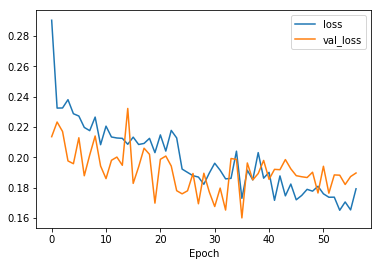

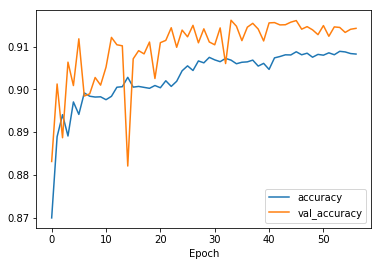

In [27]:
import pickle

history = pickle.load(open("History/history0_Parameterized.sav","rb"))
plt.figure()
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.show()
plt.figure()
plt.plot(history['acc'], label='accuracy')
plt.plot(history['val_acc'], label='val_accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.show()

['Background', 'Bins', 'Signal']


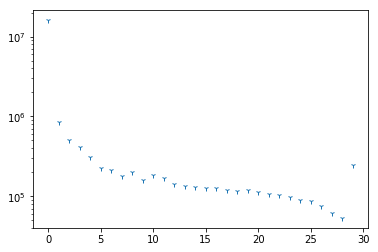

In [26]:
with h5py.File("ShapeOutput/Score0_Parameterized_Init1000NW_1600_100.h5","r") as res:
    print(list(res))
    bkg = res['Background'][:]
    sn = res['Signal'][:]
    bins = res['Bins'][:]
    plt.plot(bkg,'1')
    plt.yscale('log')
    #plt.plot(sn,color='r')

In [120]:
with h5py.File("TempResult.h5") as test:
    print(list(test.keys()))
    print(test['Weight_Background'][:5])

['Background', 'Bins', 'Signal', 'Weight_Background', 'Weight_Signal']
[  2.99144313e-06   2.13549029e-05   4.03745389e-06   1.94336462e-05
   2.32958371e-07]


In [182]:
def create_model(optimizer='adam', layers=3, init_size = 100):
    from keras.models import Sequential
    from keras.layers import Input, Dense, Dropout

    # Training with a simple FFNN
    model = Sequential()
    for lay in range(layers):
        size = int(init_size/2**lay)
        if size < 5: break
        if lay==0:
            model.add(Dense(size, input_shape=(14,), activation='relu'))
        else:
            model.add(Dropout(0.5))
            model.add(Dense(size, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))

    model.summary()
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model
create_model()

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:04:00.0)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 52        
Total para

## 